# IMPORTING LIBRARIES

In [37]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from sklearn.cluster import DBSCAN
import seaborn as sns
from scipy.spatial.distance import squareform

# CSV FILE SELECTION

In [101]:
def select_file():
    root = Tk()
    root.withdraw()  # Hide the main Tkinter window
    file_path = askopenfilename(title="Select CSV File", filetypes=[("CSV Files", "*.csv")])
    return file_path

# Prompt user to select a file
file_path = select_file()
if not file_path:
    print("No file selected. Exiting...")
    exit()

print(file_path)


C:/Users/HP/OneDrive/Documenti/JTBD/jtbd_dataset_whit_resistance.csv


# DATA LOADING AND PREPROCESSING

In [102]:
# Load Dataset
data = pd.read_csv(file_path)

# droping the story id column
X = data.drop('Story_ID', axis=1)

data.head()

,Story_ID,Push_1,Push_2,Push_3,Push_4,Push_5,Push_6,Push_7,Push_8,Push_9,...,Anxiety_6,Anxiety_7,Anxiety_8,Anxiety_9,Inertia_1,Inertia_2,Inertia_3,Inertia_4,Inertia_5,Inertia_6
0,Story_1,1,0,0,0,1,0,0,1,1,...,0,1,1,1,1,0,1,1,1,0
1,Story_2,1,0,0,0,1,0,1,0,1,...,0,1,1,1,1,1,0,1,1,0
2,Story_3,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1,1,0
3,Story_4,1,0,1,1,0,0,1,1,1,...,0,0,1,1,0,0,0,1,1,1
4,Story_5,0,1,1,0,0,1,0,1,0,...,1,0,0,1,1,0,1,0,1,0


In [103]:
data.describe()

,Push_1,Push_2,Push_3,Push_4,Push_5,Push_6,Push_7,Push_8,Push_9,Push_10,...,Anxiety_6,Anxiety_7,Anxiety_8,Anxiety_9,Inertia_1,Inertia_2,Inertia_3,Inertia_4,Inertia_5,Inertia_6
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,...,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,0.600000,0.550000,0.600000,0.450000,0.65000,0.600000,0.500000,0.400000,0.35000,0.550000,...,0.35000,0.450000,0.500000,0.500000,0.35000,0.250000,0.400000,0.800000,0.65000,0.500000
std,0.502625,0.510418,0.502625,0.510418,0.48936,0.502625,0.512989,0.502625,0.48936,0.510418,...,0.48936,0.510418,0.512989,0.512989,0.48936,0.444262,0.502625,0.410391,0.48936,0.512989
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.00000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,0.500000,0.000000,0.00000,1.000000,...,0.00000,0.000000,0.500000,0.500000,0.00000,0.000000,0.000000,1.000000,1.00000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.00000,0.250000,1.000000,1.000000,1.00000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Story_ID   20 non-null     object
 1   Push_1     20 non-null     int64 
 2   Push_2     20 non-null     int64 
 3   Push_3     20 non-null     int64 
 4   Push_4     20 non-null     int64 
 5   Push_5     20 non-null     int64 
 6   Push_6     20 non-null     int64 
 7   Push_7     20 non-null     int64 
 8   Push_8     20 non-null     int64 
 9   Push_9     20 non-null     int64 
 10  Push_10    20 non-null     int64 
 11  Push_11    20 non-null     int64 
 12  Pull_1     20 non-null     int64 
 13  Pull_2     20 non-null     int64 
 14  Pull_3     20 non-null     int64 
 15  Pull_4     20 non-null     int64 
 16  Pull_5     20 non-null     int64 
 17  Pull_6     20 non-null     int64 
 18  Pull_7     20 non-null     int64 
 19  Pull_8     20 non-null     int64 
 20  Anxiety_1  20 non-null     int64 


In [105]:
X.head()

,Push_1,Push_2,Push_3,Push_4,Push_5,Push_6,Push_7,Push_8,Push_9,Push_10,...,Anxiety_6,Anxiety_7,Anxiety_8,Anxiety_9,Inertia_1,Inertia_2,Inertia_3,Inertia_4,Inertia_5,Inertia_6
0,1,0,0,0,1,0,0,1,1,1,...,0,1,1,1,1,0,1,1,1,0
1,1,0,0,0,1,0,1,0,1,1,...,0,1,1,1,1,1,0,1,1,0
2,0,0,1,0,0,0,0,0,1,1,...,1,0,0,0,0,0,1,1,1,0
3,1,0,1,1,0,0,1,1,1,1,...,0,0,1,1,0,0,0,1,1,1
4,0,1,1,0,0,1,0,1,0,1,...,1,0,0,1,1,0,1,0,1,0


# INITIAL SCATTER PLOT

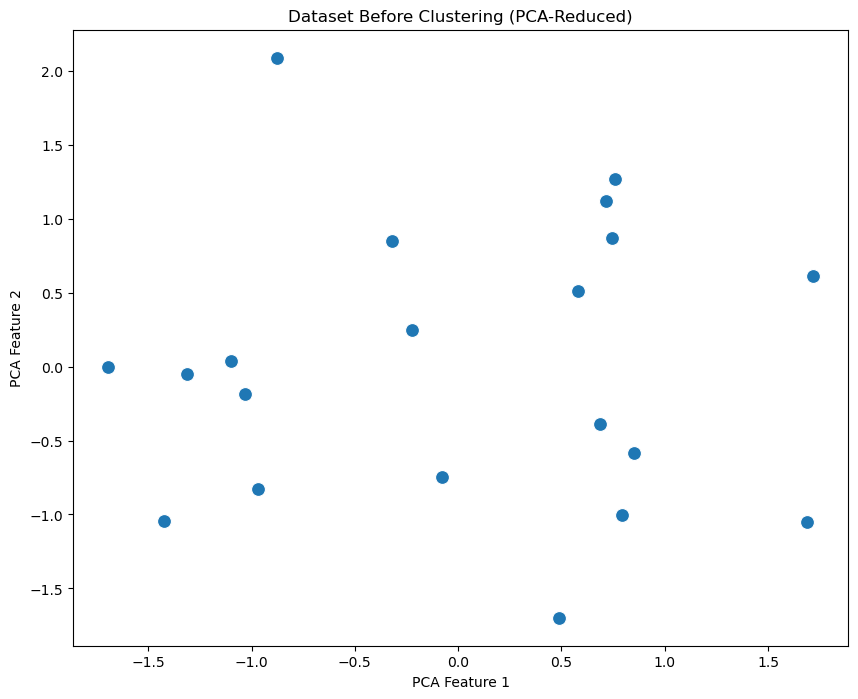

In [106]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 2], s=100)
plt.title("Dataset Before Clustering (PCA-Reduced)")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.show()

# NEAREST NEIGHBOURS ANALYSIS

In [109]:
def nna(x):

    # Applying nearest neighbors analysis
    n_neighbors = 3  # Number of nearest neighbors
    nearest_neighbors = NearestNeighbors(n_neighbors=n_neighbors, metric="euclidean")
    nearest_neighbors.fit(x)

    # Compute the neighbor connectivity
    distances, indices = nearest_neighbors.kneighbors(x)

    # Apply clustering using connectivity information
    # using DBSCAN to form clusters based on neighborhood density
    dbscan = DBSCAN(eps=distances.mean(), min_samples=n_neighbors, metric="euclidean")
    labels = dbscan.fit_predict(x)

     # Remap the labels so that -1 (noise) becomes a positive integer.
    unique_labels = sorted(set(labels))
    label_mapping = {}
    new_label = 1
    for lab in unique_labels:
        label_mapping[lab] = new_label
        new_label += 1
    remapped_labels = np.array([label_mapping[lab] for lab in labels])

  # Conditional check based on the number of columns in x.
    # If x has more than 4 columns, return the raw labels.
    # Otherwise, return the remapped labels.
    if x.shape[1] > 4:
        print("Cluster Labels:", labels)
        return labels, distances, indices
    elif x.shape[1] < 4:
        print("Cluster Labels:", remapped_labels)
        return remapped_labels, distances, indices


# SCATTER PLOT AFTER CLUSTERING IS APPLIED

Cluster Labels: [1 2 1 1 1 1 1 1 2 1 1 2 3 1 3 1 1 1 3 1]


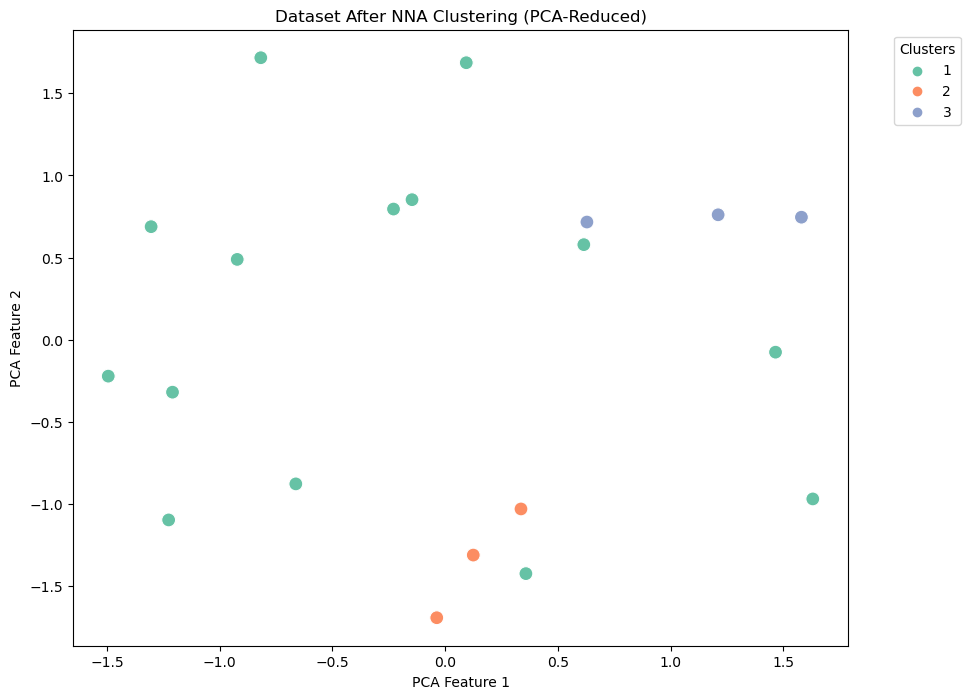

In [110]:

labels_pca, distances_pca, indices_pca = nna(X_pca)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 1], y=X_pca[:, 0], hue=labels_pca, palette="Set2", s=100)
plt.title("Dataset After NNA Clustering (PCA-Reduced)")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# DENDOGRAM 

Cluster Labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


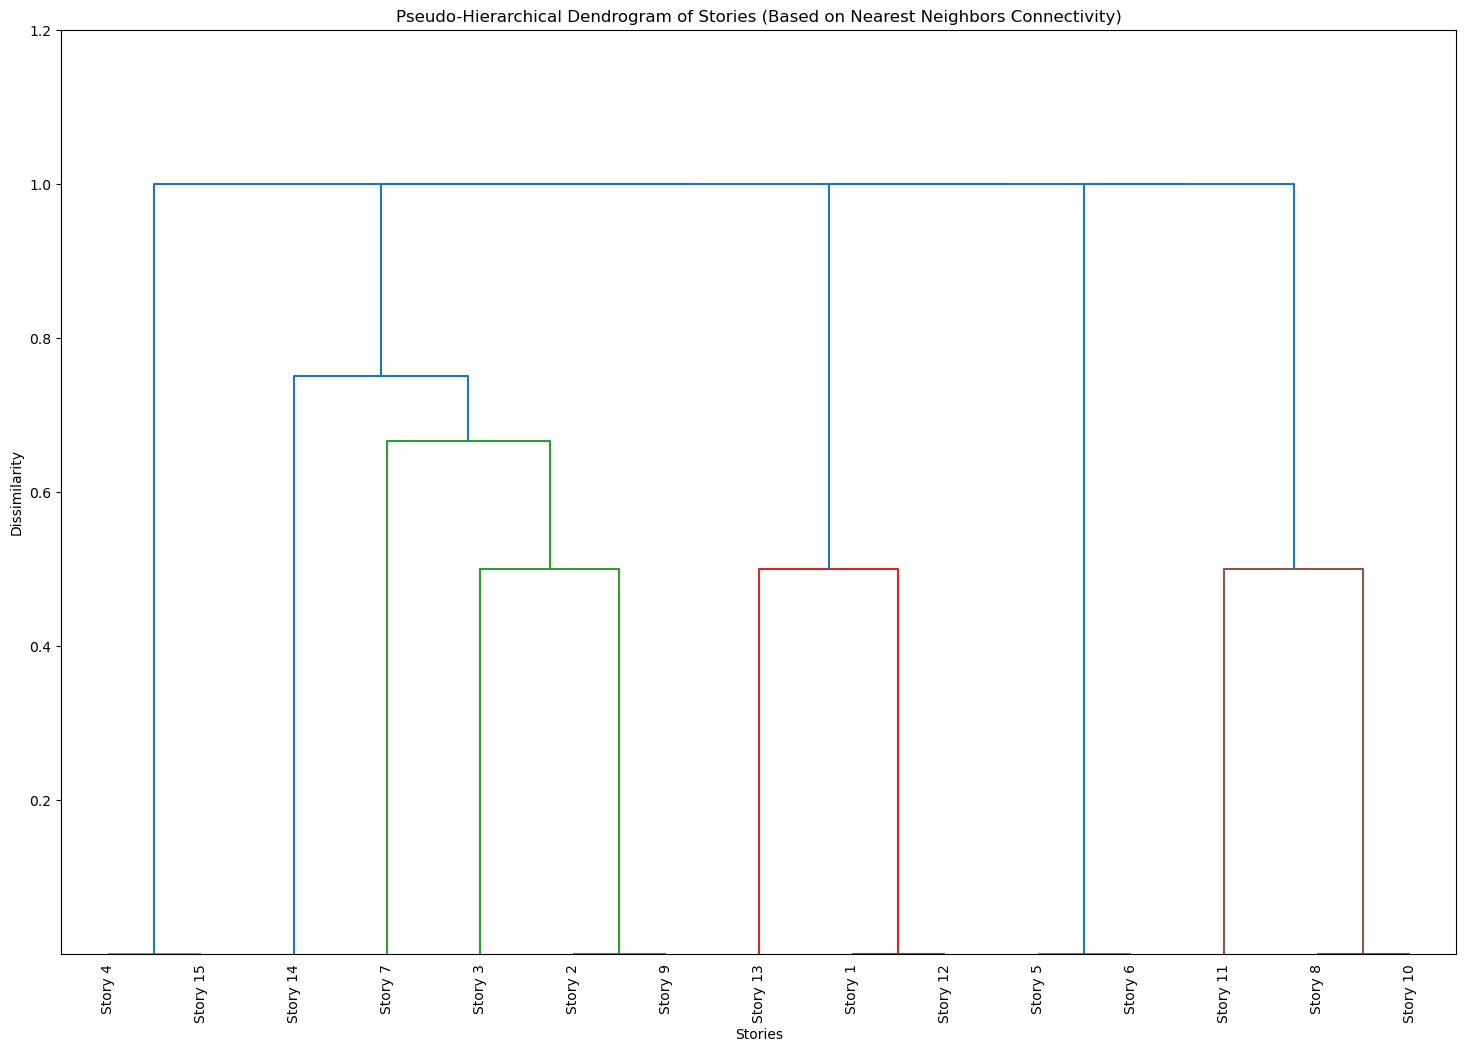

In [98]:
labels, distances, indices = nna(X)
# Construct Connectivity Matrix
num_points = len(X)
connectivity_matrix = np.zeros((num_points, num_points))

for i in range(num_points):
    for j in indices[i]:
        connectivity_matrix[i, j] = 1
        connectivity_matrix[j, i] = 1  # Symmetric matrix

# Convert Connectivity to Dissimilarity
dissimilarity_matrix = 1 - connectivity_matrix

# Generate Pseudo-Hierarchical Linkage
linkage_matrix = linkage(squareform(dissimilarity_matrix), method="average")

# Plot Dendrogram for Stories
plt.figure(figsize=(18, 12))
dendrogram(linkage_matrix, labels=[f"Story {i+1}" for i in range(len(X))], leaf_rotation=90, leaf_font_size=10)
plt.title("Pseudo-Hierarchical Dendrogram of Stories (Based on Nearest Neighbors Connectivity)")
plt.xlabel("Stories")
plt.ylabel("Dissimilarity")
# plt.yticks(np.linspace(0.00001, 1.0, 5))  # Generate 10 evenly spaced ticks
plt.ylim(0.00001, 1.2)
plt.show()

# NNA EVALUATION

In [100]:
# Evaluate clustering performance
if len(set(labels)) > 1:  # Ensure more than one cluster exists
    silhouette_avg = silhouette_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)    
    davies_bouldin = davies_bouldin_score(X, labels)
else:
    silhouette_avg, calinski_harabasz, davies_bouldin = None, None, None

print("Evaluation Metrics On Dataset With Resistance Forces:")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")
print(f"Davies-Bouldin Score: {davies_bouldin}")

Evaluation Metrics On Dataset With Resistance Forces:
Silhouette Score: None
Calinski-Harabasz Score: None
Davies-Bouldin Score: None
